# Graduate Admission Analysis and Prediction

## Introduction to Dataset

This dataset includes data for graduate degrees admission (Masters), originally found on "Kaggle" (https://www.kaggle.com/mohansacharya/graduate-admissions)

The set includes the following Columns : Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA (on scale of 10), Research, Chance of Admit

## Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [8]:
data = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [9]:
data.drop('Serial No.', inplace=True, axis=1)
data.rename({'Chance of Admit ': 'Chance of Admit', 'LOR ':'LOR'}, axis=1, inplace=True)

## Exploratory Data Analysis

In [10]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [13]:
## Correlation Coefficients
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


Text(0.5, 1.0, 'Correlation Factors Heat Map')

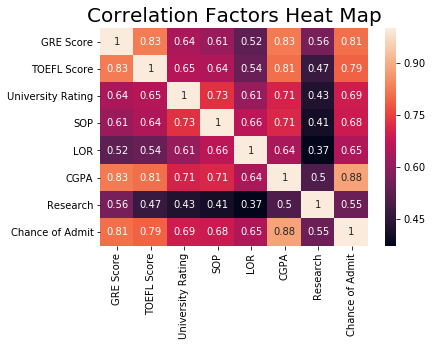

In [15]:
## Correlation coeffecients heatmap
sns.heatmap(data.corr(), annot=True).set_title('Correlation Factors Heat Map', color='black', size='20')

In [17]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

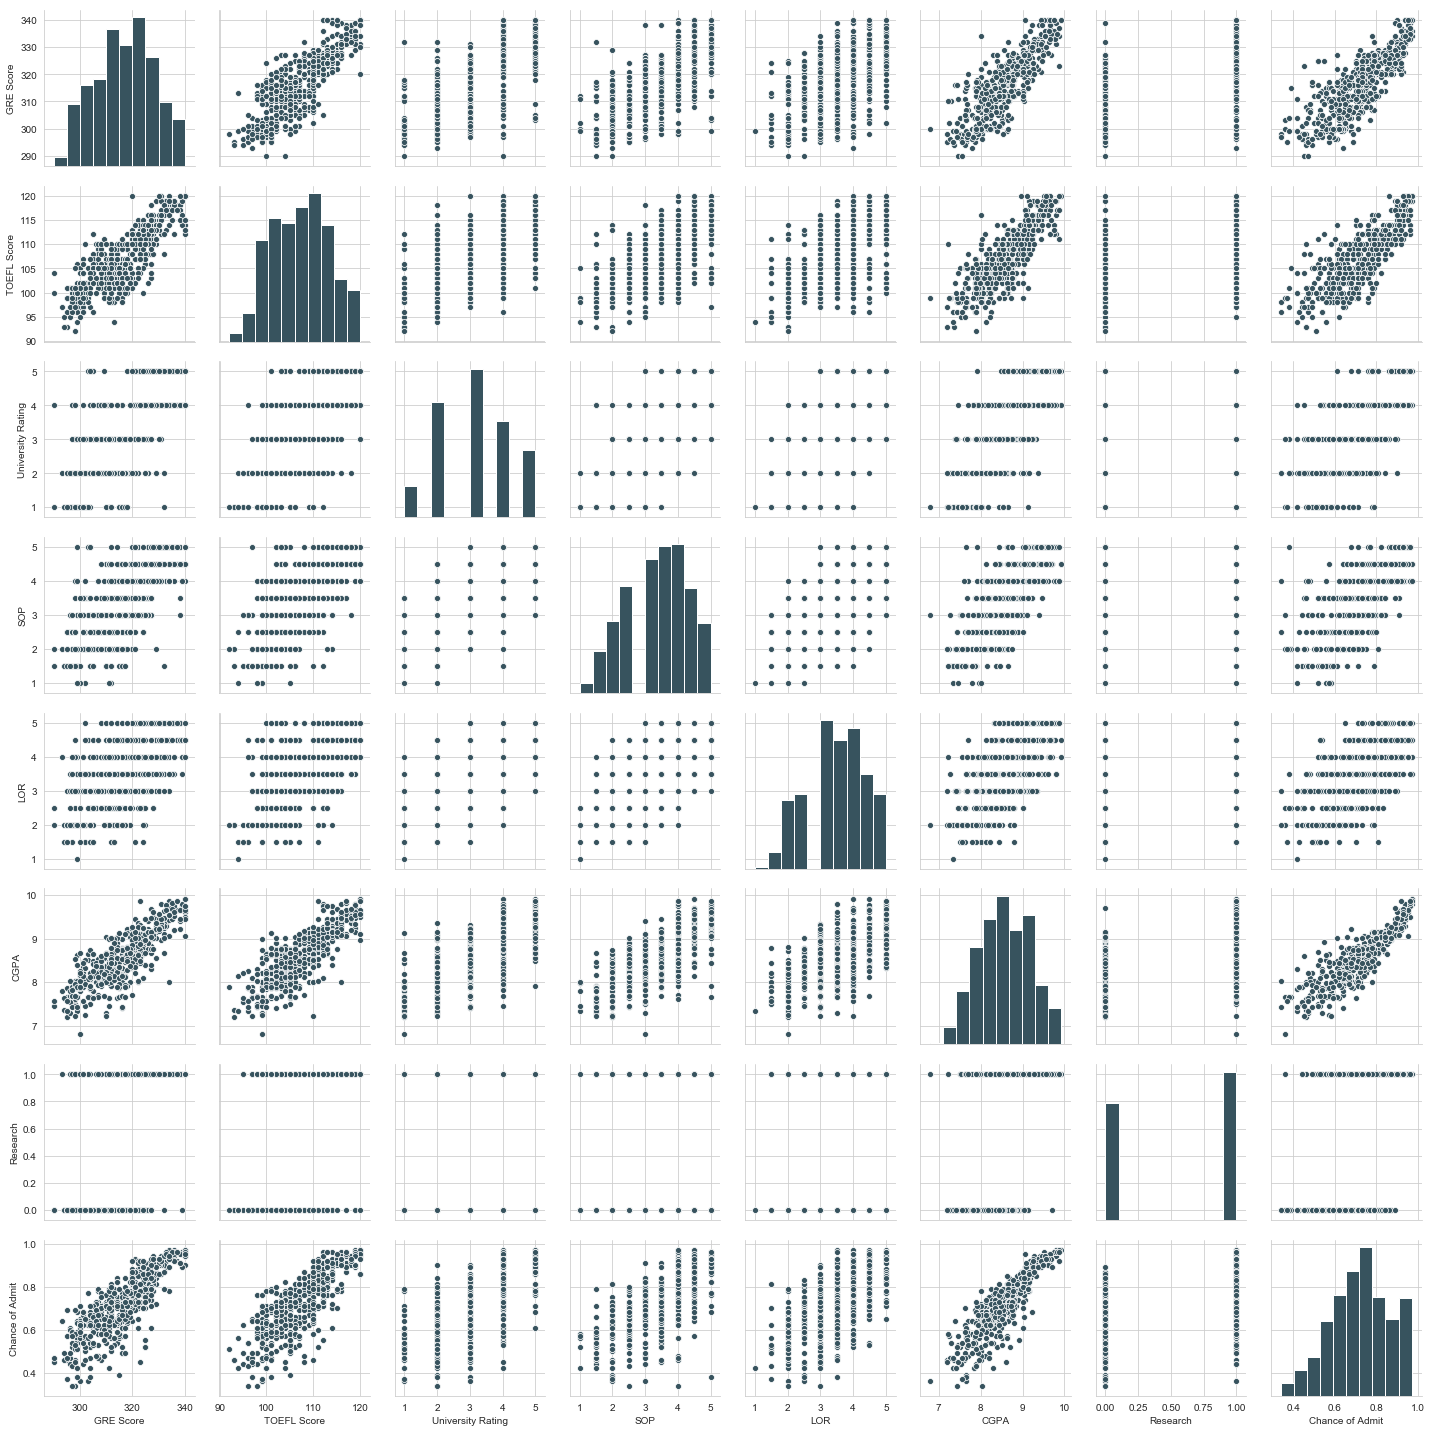

In [18]:
sns.pairplot(data)

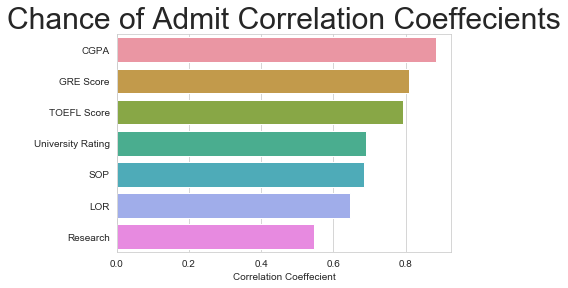

In [19]:
COA_corr = pd.DataFrame(data.corr()['Chance of Admit'])
COA_corr.rename({'Chance of Admit': 'Correlation Coeffecient'}, axis=1, inplace=True)
COA_corr.drop('Chance of Admit', inplace=True)
COA_corr.sort_values(['Correlation Coeffecient'], ascending=False, inplace=True)
COA_corr_x = COA_corr.index
COA_corr_y = COA_corr['Correlation Coeffecient']
sns.barplot(y=COA_corr_x,x=COA_corr_y).set_title('Chance of Admit Correlation Coeffecients', size='30')
plt.show()

It is evident that the most contribution factors to the chance of admission are CGPA, GRE Score and TOEFL Score.

## Training and Testing Data

In [20]:
X = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']]
y = data['Chance of Admit']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.33, random_state=42)

## Training the Model

### Linear Regression with all variables

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lm = LinearRegression()

In [31]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
coeff = pd.DataFrame(lm.coef_, X.columns, columns=['Coeffecients'])
coeff

,Coeffecients
GRE Score,0.002134
TOEFL Score,0.003226
University Rating,0.003048
SOP,0.001616
LOR,0.015597
CGPA,0.120226
Research,0.016726


## Predicting Test Data

In [33]:
predictions = lm.predict(X_test)

In [34]:
print("Intercept : ",lm.intercept_)

Intercept :  -1.4071517979913029


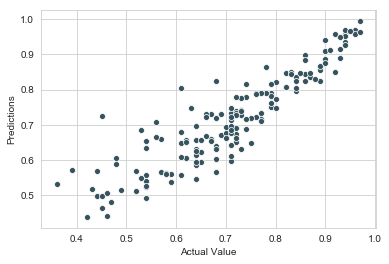

In [35]:
sns.scatterplot(y_test, predictions)
plt.ylabel("Predictions")
plt.xlabel("Actual Value")
plt.show()

## Residuals

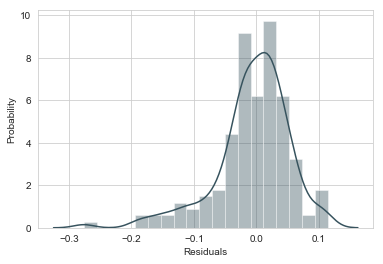

In [37]:
residuals = y_test - predictions
sns.distplot(residuals)
plt.xlabel("Residuals")
plt.ylabel("Probability")
plt.show()
plt.show()

The scatter plot for the actual and predicted values shows distortion for chances of admit lower than 0.6, while the distribution plot for residuals show a uniform distribution with a mean of 0.0.

## Conclusion

In [38]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)
R_squared = metrics.r2_score(y_test, predictions)
pd.DataFrame(data=[MAE, MSE, RMSE, R_squared], index=['MAE', 'MSE', 'RMSE', 'R Squared'], columns=['Value'])

,Value
MAE,0.043089
MSE,0.003621
RMSE,0.060178
R Squared,0.824231


##### To conclude the model explains 82% of the variability and has an error of .06 in predictions.

What do the Linear Regression Models tell us?

1.Including all variables in the model yielded a R Sqaured value of .82, implying that these variables are the factors that will most likely to get you that graduate degree admission, so other variables such as age, work experience or even gender will not contribute much into your admission.

2.Telling by the correlation factor, CGPA is the most important factor.